#Polynomial Curve Fitting

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
def syntactic_data(num_data=10, interval=[0,1], func=np.sin, sigma=0.2, seed=1):
  """
  This function creates a syntactic data with Gaussian noise
  """
  random.seed(seed)
  x = np.linspace(interval[0], interval[1], num_data)
  x_100p = np.linspace(interval[0], interval[1], 100)
  noise = np.random.normal(0,sigma,num_data)
  y = func(2*np.pi*x) + noise
  y_true_100p = func(2*np.pi*x_100p)
  y_test_100p = func(2*np.pi*x_100p) + np.random.normal(0,sigma,100)
  return x, y, x_100p, y_true_100p, y_test_100p

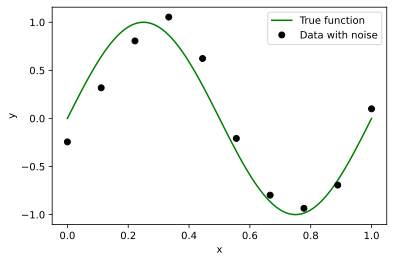

In [3]:
x, y, x_100p, y_true_100p, y_test_100p = syntactic_data()
plt.plot(x_100p, y_true_100p, color='green', label="True function")
plt.plot(x, y, 'o', color='black', label="Data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

In [4]:
def y_pred_and_E_RMS(x, y ,degree=3):
  """
  Predict the target and calculates E_RMS and w_star
  (need to write separate functions for y_pred and w)
  """
  X = np.ones((len(x),degree+1))
  for i in range(1, degree+1):
    X[:,i] = x**i
  w_star = np.linalg.pinv(X) @ y.reshape(-1,1) 
  y_pred = X @ w_star.reshape(-1,1)
  E = 0.5 * np.linalg.norm(y-y_pred)**2
  E_RMS = np.sqrt(2*E/len(y)) 
  return y_pred.reshape(-1), E_RMS, w_star , X

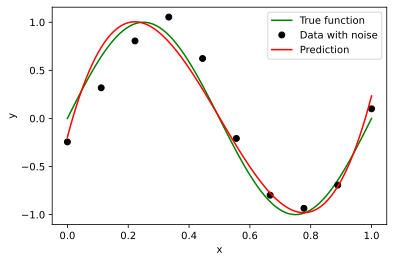

In [5]:
degree = 3
y_pred_100p = y_pred_and_E_RMS(x_100p, y_test_100p ,degree=degree)[0]

plt.plot(x_100p, y_true_100p, color='green', label="True function")
plt.plot(x, y, 'o', color='black', label="Data with noise")
plt.plot(x_100p, y_pred_100p, color='red', label="Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

##Root Mean Square error ($E_{RMS}$)

In [ ]:
E_train = [y_pred_and_E_RMS(x, y, degree=d)[1] for d in range(10)]
E_test  = [y_pred_and_E_RMS(x_100p, y_test_100p, degree=d)[1] for d in range(10)]

plt.plot(list(range(10)), E_train, color='blue', label="Training")
plt.plot(list(range(10)), E_test , color='red',  label="test")
plt.xlabel("$M$")
plt.ylabel("$E_{RMS}$")
plt.legend();